# Heart Disease Prediction
![](https://media.istockphoto.com/vectors/heart-isometric-health-care-concept-red-shape-and-heartbeat-vector-id1183325543?k=20&m=1183325543&s=612x612&w=0&h=8AFG-3S4WTuK6RaCvGKtOy2ndQFDhwTrA36XbDoVOrQ=)
* Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

* People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

## Data Overview
1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

#### Type of Machine Learning task : 
It is an classification problem where given a set of features we need to predict whether that person is prone to heart diseases or not.

#### Performace Metric
Since it is an classification problem we will use AUC-ROC, F1-score, Accuracy, Precision, Recall, and Confusion Matrix.


# Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [7]:
df = pd.read_csv('heart.csv')

In [8]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# Exploratory Data Analysis (EDA)

In [9]:
df.shape


(918, 12)

There are 918 instances each having 12 different features.

## Distribution of Heart Disease with Age

<AxesSubplot:xlabel='Age', ylabel='Count'>

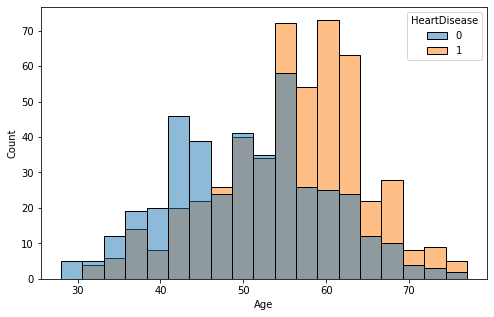

In [24]:
plt.figure(figsize=(8,5))
sns.histplot(x='Age',data=df,hue='HeartDisease')

As we can see, Heart Disease in common in old people having age greater than 50

## Distribution of Heart Disease with Sex

<AxesSubplot:xlabel='Sex', ylabel='count'>

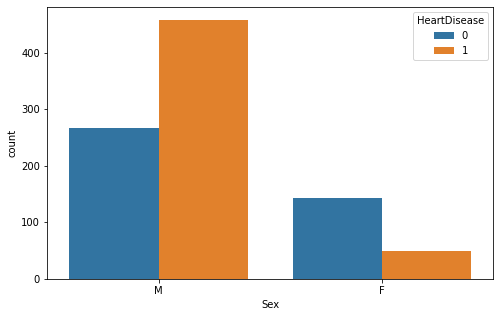

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(x='Sex',data=df,hue='HeartDisease')

Heart Diseases are more frequent in males than in females

## Distribution of Heart Disease with Chest Pain Type

<AxesSubplot:xlabel='ChestPainType', ylabel='count'>

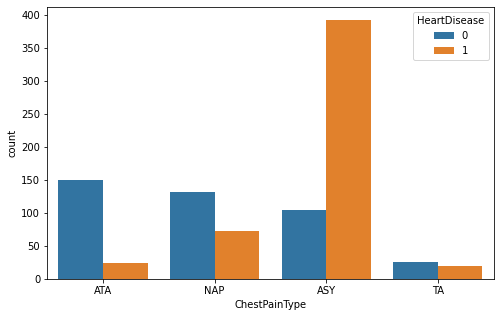

In [25]:
plt.figure(figsize=(8,5))
sns.countplot(x='ChestPainType',data=df,hue='HeartDisease')

Most of the heart disease patient suffer from Asymptomatic(ASY) ChestPainType

## Distribution of Heart Disease with Resting Blood Pressure (RestingBP)

<AxesSubplot:xlabel='RestingBP', ylabel='Count'>

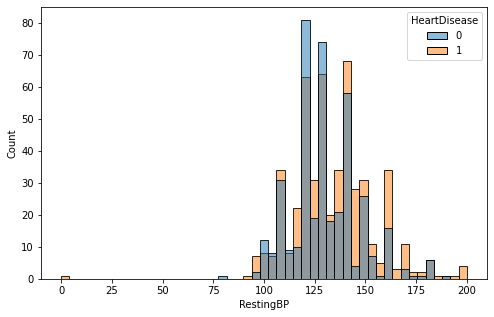

In [27]:
plt.figure(figsize=(8,5))
sns.histplot(x='RestingBP',data=df,hue='HeartDisease')

Not much can be infered from the graph. We do observe that Resting BP is somewhat normally distributed with mean around 130.

## Distribution of Heart Disease with Cholesterol

<AxesSubplot:xlabel='Cholesterol', ylabel='Count'>

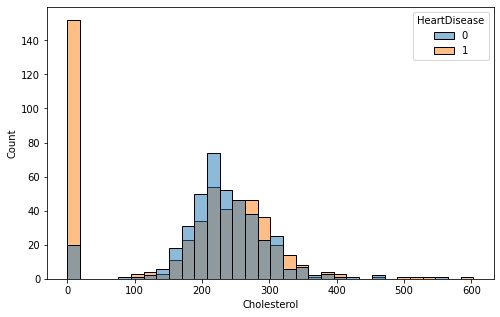

In [29]:
plt.figure(figsize=(8,5))
sns.histplot(x='Cholesterol',data=df,hue='HeartDisease')

Low Cholesterol can be seen as one of the major causes of Heart Disease

## Distribution of Heart Disease with Fasting Blood Sugar (FastingBS)

<AxesSubplot:xlabel='FastingBS', ylabel='count'>

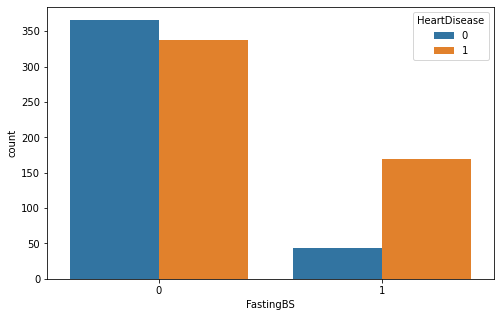

In [33]:
plt.figure(figsize=(8,5))
sns.countplot(x='FastingBS',data=df,hue='HeartDisease')

From the graph it looks like, having FastingBS value 1 is more prone to heart disease. Although they is an equal chance of getting a heart disease with FastingBS equal to 0.

## Distribution of Heart Disease with Resting ElectroCardioGram (Resting ECG)

<AxesSubplot:xlabel='RestingECG', ylabel='count'>

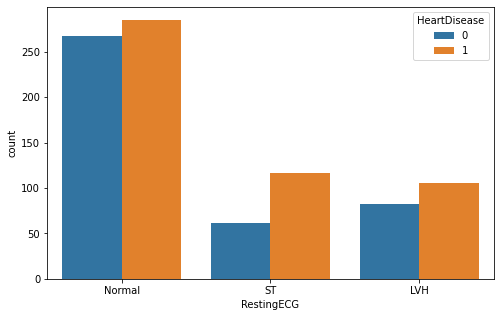

In [34]:
plt.figure(figsize=(8,5))
sns.countplot(x='RestingECG',data=df,hue='HeartDisease')

Nothing much can be inferred from here. But still we can say that RestingECG value of ST is more prone to heart disease.

## Distribution of Heart Disease with Maximum Heart Rate (MaxHR)

<AxesSubplot:xlabel='MaxHR', ylabel='Count'>

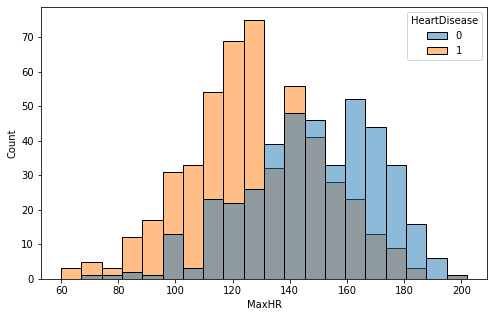

In [37]:
plt.figure(figsize=(8,5))
sns.histplot(x='MaxHR',data=df,hue='HeartDisease')

Having low heart rate looks like one of the causes of heart disease

## Distribution of Heart Disease with Exercise-Induced Angina

<AxesSubplot:xlabel='ExerciseAngina', ylabel='count'>

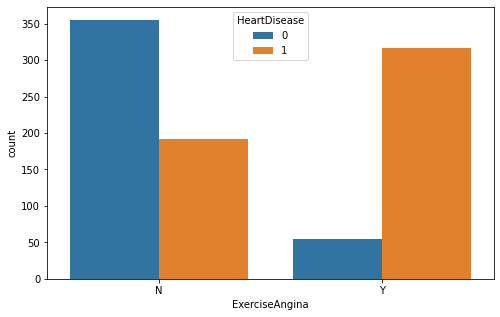

In [38]:
plt.figure(figsize=(8,5))
sns.countplot(x='ExerciseAngina',data=df,hue='HeartDisease')

A person is on the safer side if he doesn't suffer from exercise-induced angina compared to the person who does.

## Distribution of Heart Disease with Oldpeak

<AxesSubplot:xlabel='Oldpeak', ylabel='Count'>

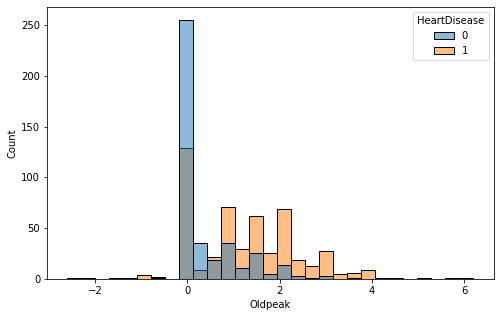

In [39]:
plt.figure(figsize=(8,5))
sns.histplot(x='Oldpeak',data=df,hue='HeartDisease')

Most of the people who are safe from heart disease have oldpeak value close to zero

## Distribution of Heart Disease with ST Slope

<AxesSubplot:xlabel='ST_Slope', ylabel='count'>

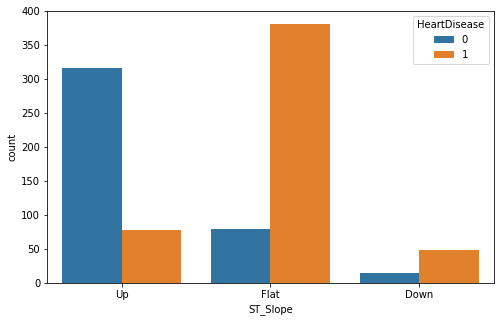

In [40]:
plt.figure(figsize=(8,5))
sns.countplot(x='ST_Slope',data=df,hue='HeartDisease')

A flat ST_slope makes one prone to heart disease.

# Data Preprocessing

In [42]:
X = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']

In [43]:
categorical_cols = [col for col in X.columns if X[col].nunique() < 10 and X[col].dtype == "object"]
numerical_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]

## One Hot Encoding Categorical Columns

In [49]:
X_new = pd.get_dummies(X, columns = categorical_cols)

In [ ]:
categorical_cols = [col for col in X.columns if X[col].nunique() < 10 and X[col].dtype == "object"]
numerical_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]

## Standardisation

In [51]:
from sklearn.preprocessing import  MinMaxScaler

In [52]:
ssc = StandardScaler()

In [53]:
X_new[0]

array([0.24489796, 0.7       , 0.47927032, 0.        , 0.78873239,
       0.29545455, 0.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 1.        ])